In [ ]:
# PROJECT : Predicting Future Price in the cryptocurrency
# RESEARCHER : Hyun Ho Park
# Created At : 2023-05-29
# Updated At : 2023-06-03

In [ ]:
'''
Need to make function
0. Get coin list [DONE]
1. Crawl the dataset from website [DONE]
2. Apply prophet to return future prediction - change into arima [Done]
3. Make predicted documents [on-going]
'''

c:\Users\HYUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\HYUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\HYUN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


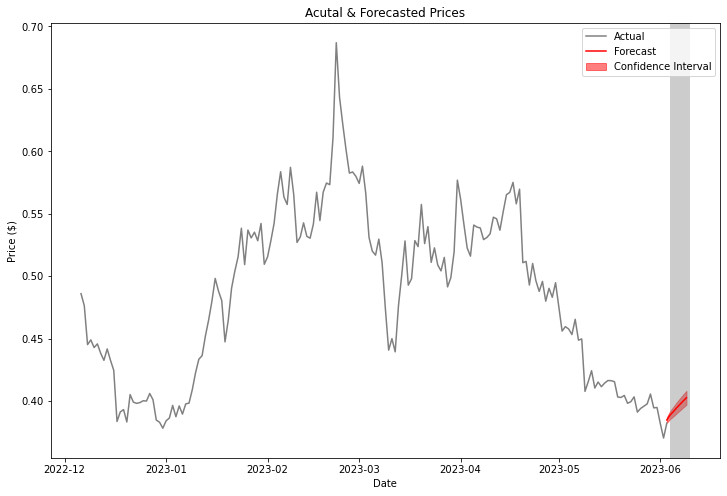

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('../1inch-usd-max.csv')
total_df = df.iloc[-180:].copy()

# Set the date column as the index
total_df['snapped_at'] = pd.to_datetime(total_df['snapped_at'])
total_df.set_index('snapped_at', inplace=True)
total_df.sort_index(inplace=True)

# Fit the ARIMA model
model = ARIMA(total_df['price'], order=(2, 0, 2))  # Set the order of the AR, I, and MA components
model_fit = model.fit()

# Forecast 7 days future prices
forecast = model_fit.get_forecast(steps=7)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.9)  # Decrease alpha for a narrower interval (e.g., alpha=0.01)

# Calculate percentage change from the last day in df to predicted values for 1 to 7 days
last_day_price = total_df['price'].iloc[-1]
percentage_change = (forecast_values / last_day_price - 1) * 100

# Create a new index for the forecasted values
forecast_index = pd.date_range(start=total_df.index[-1], periods=7, freq='D')
forecast_values = forecast_values.tolist()

plt.figure(figsize=(12, 8))
plt.plot(total_df.index, total_df['price'], label='Actual',  color = 'grey')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

for i in range(1, len(forecast_index)):
    plt.axvspan(forecast_index[i], forecast_index[i] + pd.Timedelta(days=1), facecolor='grey', alpha=0.4)

lower_bound = conf_int['lower price'].tolist()
upper_bound = conf_int['upper price'].tolist()
plt.fill_between(forecast_index, lower_bound, upper_bound, color='red', alpha=0.5, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Acutal & Forecasted Prices')
plt.legend(loc='upper right')
plt.show()

# Create a dataframe with predicted values and percentage change
forecast_df = pd.DataFrame({
    'Base Date': total_df.index[-1],
    'Date': forecast_index + pd.Timedelta(days=1),
    'Base Price': [total_df['price'].iloc[-1]] * 7,
    'Forecast': forecast_values,
    'Percentage Change': percentage_change
}).reset_index(drop=True)


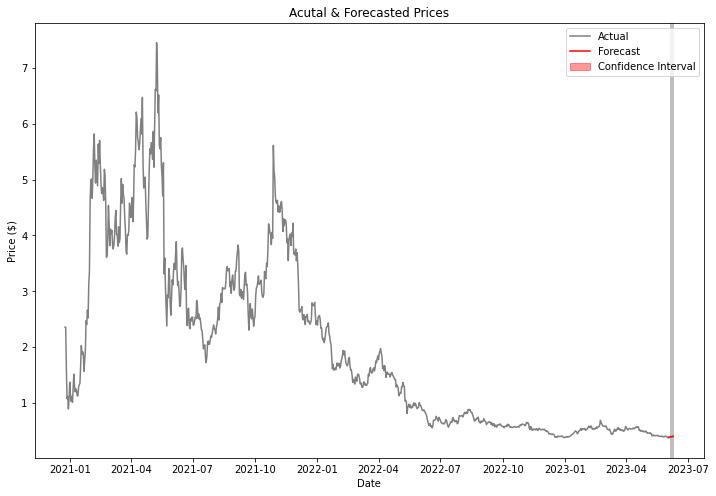

In [10]:
# Set the date column as the index
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df.set_index('snapped_at', inplace=True)
df.sort_index(inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(df.index, df['price'], label='Actual', color = 'grey')  # Plot the entire period of the df DataFrame
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

for i in range(1, len(forecast_index)):
    plt.axvspan(forecast_index[i], forecast_index[i] + pd.Timedelta(days=1), facecolor='grey', alpha=0.5)

lower_bound = conf_int['lower price'].tolist()
upper_bound = conf_int['upper price'].tolist()
plt.fill_between(forecast_index, lower_bound, upper_bound, color='red', alpha=0.4, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Acutal & Forecasted Prices')
plt.legend(loc='upper right')
plt.show()